In [24]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
print('imported all libraries to use in  breast cancer detection')

imported all libraries to use in  breast cancer detection


## Loading the breast dataset

In [4]:
#  Load the data
df = pd.read_csv('Breast_Cancer.csv')
# check the first five rows
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## Pre processing the breast cancer dataset

In [6]:
# check the last five rows using tail
df.tail()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [8]:
#  Display the data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [13]:
#Check columns
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [14]:
# check the null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [15]:
# Display the class label distribution
print(df['Estrogen Status'].value_counts())

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64


* 3755 shows that one has breast cancer
* 269 shows there is lack of breast cancer

## EDA

In [9]:
#  Display the descriptive statistics
print(df.describe())

               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000  


<Axes: title={'center': 'Breast cancer'}, ylabel='Frequency'>

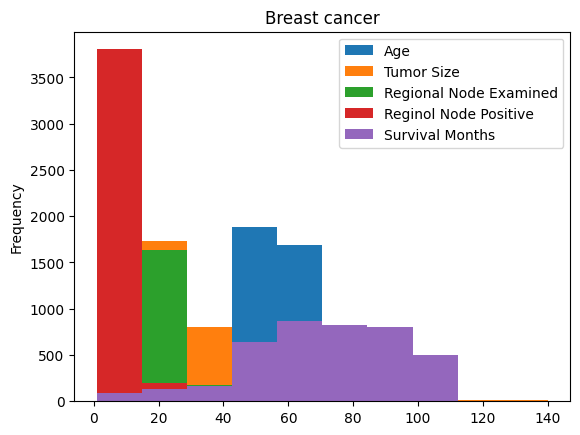

In [19]:
df.plot(kind="hist",title='Breast cancer')


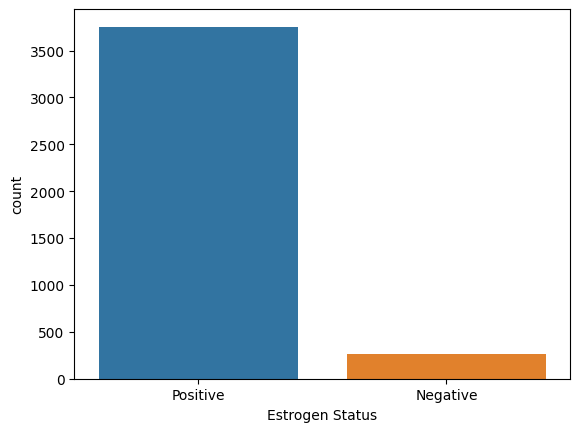

In [22]:
#  Use seaborn to display count plot for the class label
sns.countplot(x='Estrogen Status', data=df)
plt.show()

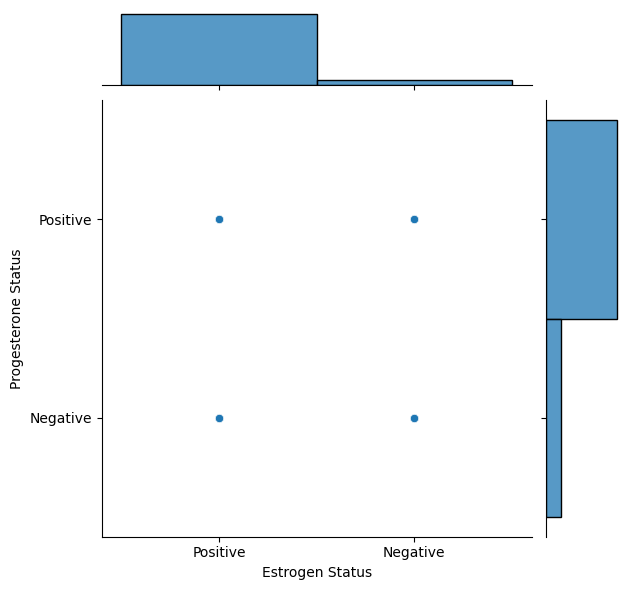

In [23]:
#  Use seaborn to display a joint plot.
sns.jointplot(x='Estrogen Status', y='Progesterone Status', data=df)

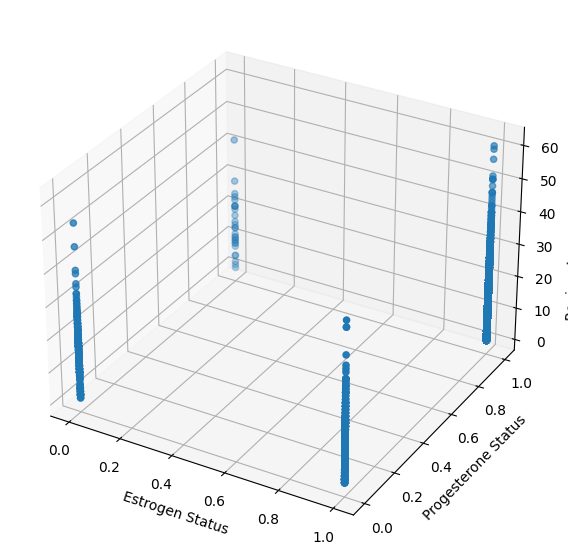

In [61]:

# Choose three variables
x = df['Estrogen Status']  # replace 'var1' with your column name
y = df['Progesterone Status']  # replace 'var2' with your column name
z = df['Regional Node Examined']  # replace 'var3' with your column name

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

ax.set_xlabel('Estrogen Status')
ax.set_ylabel('Progesterone Status')
ax.set_zlabel('Regional Node Examined')
plt.show()

<Axes: >

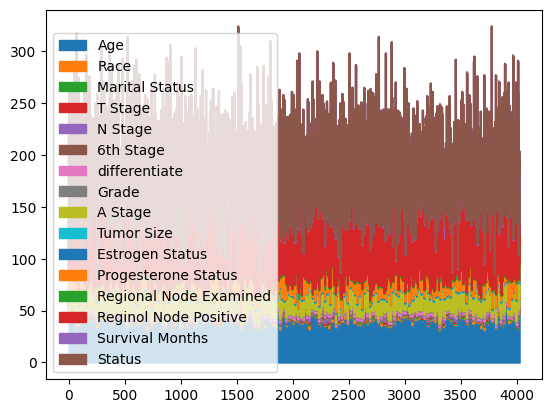

In [62]:
df.plot.area()

In [25]:
# Instantiate the encoder
le = LabelEncoder()

# Fit and transform the target variable
y = le.fit_transform(df['Estrogen Status'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

# categorical to numerical conversion

In [28]:
# Instantiate the encoder
le = LabelEncoder()

# Select object columns only
object_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to object columns
df[object_cols] = df[object_cols].apply(lambda col: le.fit_transform(col))

In [29]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


### splitting the data set into training

In [30]:
# Split the data such that 25% is reserved testing
X = df.drop('Estrogen Status', axis=1)
y = df['Estrogen Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
#  Show the shape of training set and the test set
print(X_train.shape, X_test.shape)


(3018, 15) (1006, 15)


* 3018 is used for training
* 1006 is used for testing

# model train

### Using the KNN model

In [32]:
#  Train a model using K-NN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [33]:
# the confusion matrix
print(confusion_matrix(y_test, knn_pred))

[[  4  61]
 [  5 936]]


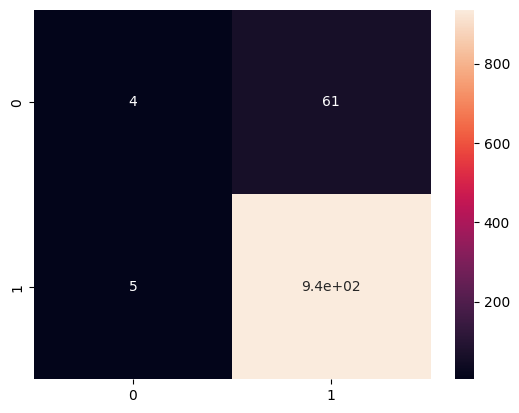

In [34]:
# the heat map
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True)
plt.show()

In [35]:
#  Show the classification accuracy
print(accuracy_score(y_test, knn_pred))

0.9343936381709742


In [36]:
# Compare the training and testing accuracy
print(knn.score(X_train, y_train), knn.score(X_test, y_test))


0.9357190192180251 0.9343936381709742


## using svm model

In [38]:
#  Train a model using SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [39]:
#  Show the confusion matrix
print(confusion_matrix(y_test, svm_pred))

[[  0  65]
 [  0 941]]


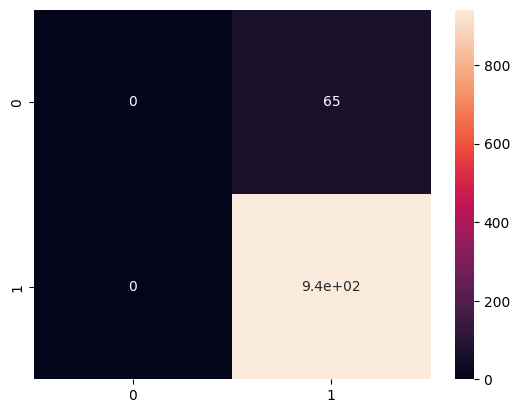

In [40]:
#  Show the heat map
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True)
plt.show()

In [41]:

#  Show the classification accuracy
print(accuracy_score(y_test, svm_pred))


0.9353876739562624


In [42]:
#  Compare the training and testing accuracy
print(svm.score(X_train, y_train), svm.score(X_test, y_test))

0.9324055666003976 0.9353876739562624


## using decision trees


In [44]:
#  Train a model using Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [45]:
#  Show the confusion matrix
print(confusion_matrix(y_test, dt_pred))

[[ 30  35]
 [ 39 902]]


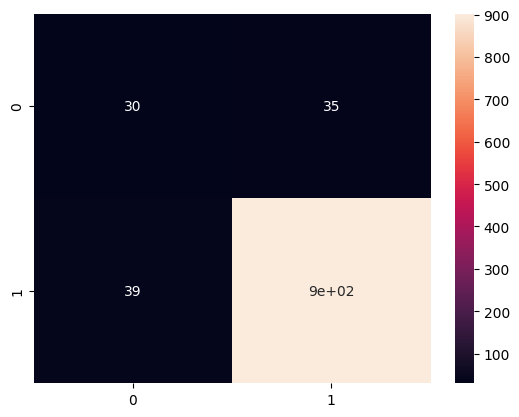

In [46]:
#  Show the heat map
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True)
plt.show()

In [47]:
#  Show the classification accuracy
print(accuracy_score(y_test, dt_pred))

0.9264413518886679


In [48]:
#  Compare the training and testing accuracy
print(dt.score(X_train, y_train), dt.score(X_test, y_test))

1.0 0.9264413518886679


### using Random Forest

In [49]:
#  Train a model using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [50]:
#  Show the confusion matrix
print(confusion_matrix(y_test, rf_pred))

[[ 27  38]
 [ 13 928]]


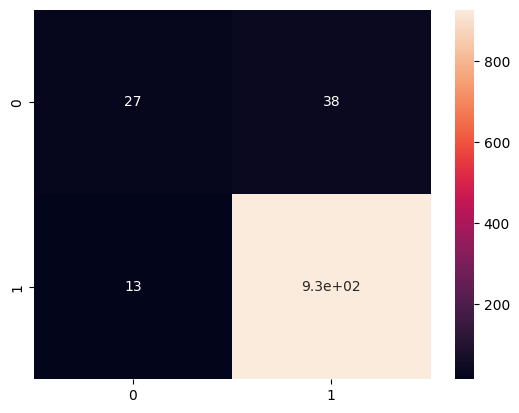

In [51]:
#  Show the heat map
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.show()

In [52]:
#  Show the classification accuracy
print(accuracy_score(y_test, rf_pred))


0.9493041749502982


In [54]:
#  Compare the training and testing accuracy
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

1.0 0.9493041749502982


In [55]:
# Collect accuracy scores in a dictionary
accuracy_scores = {
    'K-NN': accuracy_score(y_test, knn_pred),
    'SVM': accuracy_score(y_test, svm_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'Random Forest': accuracy_score(y_test, rf_pred)
}

In [56]:
# Convert dictionary to series
accuracy_series = pd.Series(accuracy_scores)

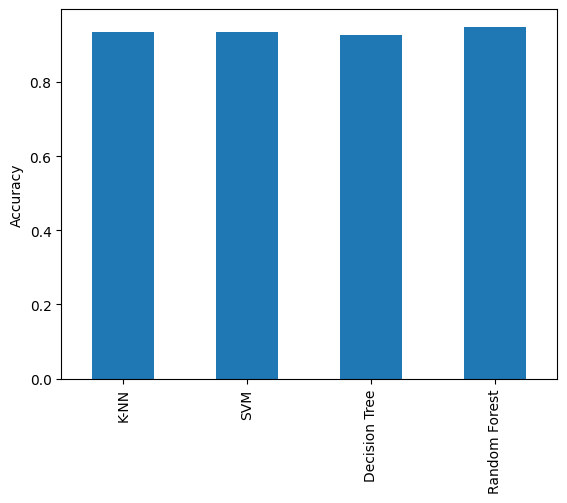

In [57]:
# Plot accuracy scores
accuracy_series.plot(kind='bar')
plt.ylabel('Accuracy')
plt.show()

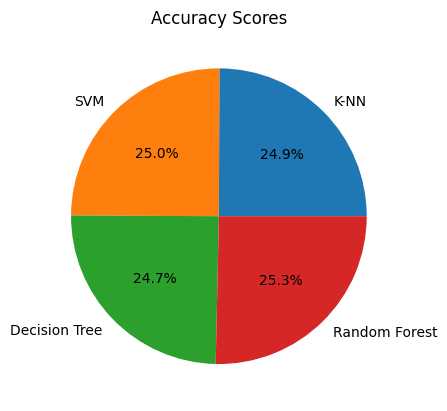

In [58]:
# Convert dictionary to series
accuracy_series = pd.Series(accuracy_scores)

# Plot pie chart of accuracy scores
accuracy_series.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Hide the y-axis label
plt.title('Accuracy Scores')
plt.show()

In [59]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
